In [1]:
%reload_ext autoreload
%autoreload 2

In [35]:
from yaml import safe_load
from pathlib import Path
from box import Box
import os, re
import cv2
import pytesseract
from pytesseract import Output

from langchain.vectorstores import FAISS
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.document_loaders import UnstructuredImageLoader, DirectoryLoader
from langchain.embeddings import HuggingFaceEmbeddings

BASE_DIR = Path("..")

with open(BASE_DIR / "config.yml", "r", encoding="utf-8") as ymlfile:
    cfg = Box(safe_load(ymlfile))

In [41]:
def load_images():
    res = []
    for dir_path, dir_names, file_names in os.walk(BASE_DIR / cfg.DATA_PATH):
        files = [Path(dir_path) / fname for fname in file_names]
        res.extend(files)
    # Load first image
    return res

imgs = load_images()

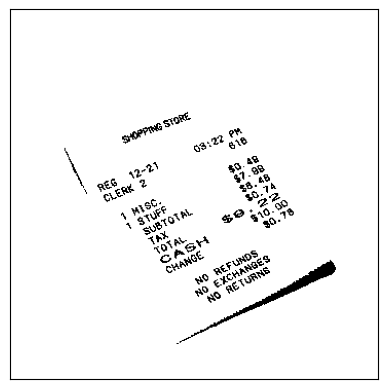

In [46]:
from exteract.cv2_utils import *
from exteract.utils import show_rgb_image

img = cv2.imread(os.path.realpath(imgs[0]))

gray = get_grayscale(img)
thresh = thresholding(gray)
opening = opening(thresh)
canny = canny(gray)

show_rgb_image(thresh)

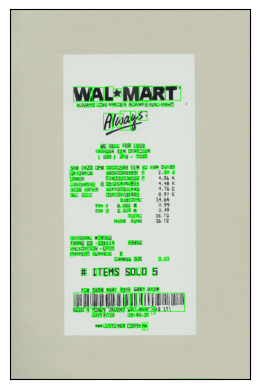

In [32]:
h,w,c = img.shape
boxes = pytesseract.image_to_boxes(img)
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0,255,0), 2)
show_rgb_image(img)

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


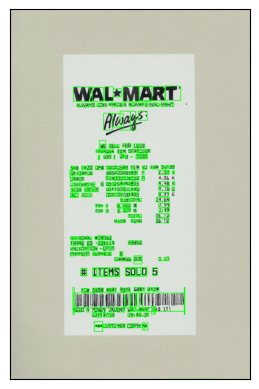

In [33]:
d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

show_rgb_image(img)

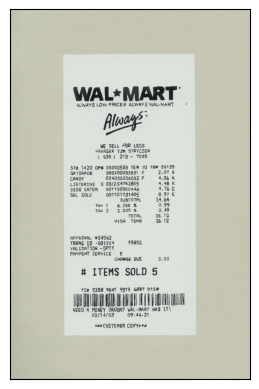

In [37]:
img = cv2.imread(os.path.realpath(imgs[0]))

d = pytesseract.image_to_data(img, output_type=Output.DICT)
keys = list(d.keys())

date_pattern = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'

n_boxes = len(d['text'])
for i in range(n_boxes):
	if int(d['conf'][i]) > 60:
		if re.match(date_pattern, d['text'][i]):
			(x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
			img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

show_rgb_image(img)

In [40]:
custom_config = r'--oem 3 --psm 6 outputbase digits'
custom_config = r'-c tessedit_char_whitelist=abcdefghijklmnopqrstuvwxyz --psm 6 outputbase digits --oem3'
print(pytesseract.image_to_string(img, config=custom_config))

z
weefless
am
e
ae i
a zf
x k
dr
ete es

tax
tax
toa
visan b
a
nt
aeice
c
fem
c
h
eeas
sasuteea

